In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6fb30e146ce48978787ba4314537e78c


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
lat_lngs

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

566

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ostrovnoy
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | kieta
Processing Record 6 of Set 1 | pangnirtung
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | sayansk
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | kemijarvi
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | ixtapa
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | ambanja
Processing Reco

Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | conceicao do araguaia
Processing Record 40 of Set 4 | yerbogachen
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | sabinov
Processing Record 43 of Set 4 | vila
Processing Record 44 of Set 4 | fort nelson
Processing Record 45 of Set 4 | zheleznodorozhnyy
Processing Record 46 of Set 4 | oranjemund
Processing Record 47 of Set 4 | xinxiang
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | martapura
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | manokwari
Processing Record 2 of Set 5 | merauke
Processing Record 3 of Set 5 | port hardy
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | jalu
Processing Record 8 of Set 5 | santa isabel do rio negro
Processing Record 9 of Set 5 | laguna
Processing Record 10 of Set 5 

City not found. Skipping...
Processing Record 26 of Set 8 | luganville
Processing Record 27 of Set 8 | jilin
Processing Record 28 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | eldorado
Processing Record 31 of Set 8 | dong hoi
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | turangi
Processing Record 34 of Set 8 | hokitika
Processing Record 35 of Set 8 | channel-port aux basques
Processing Record 36 of Set 8 | gizo
Processing Record 37 of Set 8 | naryan-mar
Processing Record 38 of Set 8 | faanui
Processing Record 39 of Set 8 | mayo
Processing Record 40 of Set 8 | udachnyy
Processing Record 41 of Set 8 | selam
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 8 | labuan
Processing Record 45 of Set 8 | meulaboh
Processing Record 46 of Set 8 | actopan
Processing Record 47 of Set 8 | poso
Processing Record

Processing Record 12 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 13 of Set 12 | maragogi
Processing Record 14 of Set 12 | khandyga
Processing Record 15 of Set 12 | sayyan
Processing Record 16 of Set 12 | blythe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

515

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.05,39.51,39.20,87,100,24.23,RU,2020-11-02 03:49:05
1,Hermanus,-34.42,19.23,62.01,87,97,4.00,ZA,2020-11-02 03:49:06
2,Fortuna,40.60,-124.16,50.00,100,1,8.05,US,2020-11-02 03:48:03
3,Khatanga,71.97,102.50,8.60,94,99,7.70,RU,2020-11-02 03:49:06
4,Kieta,-6.22,155.63,85.66,61,3,3.18,PG,2020-11-02 03:49:06
5,Pangnirtung,66.15,-65.71,7.57,84,53,5.68,CA,2020-11-02 03:49:06
6,Hilo,19.73,-155.09,82.40,65,1,4.70,US,2020-11-02 03:47:10
7,Vaini,-21.20,-175.20,78.80,83,75,10.29,TO,2020-11-02 03:49:06
8,Sayansk,54.11,102.16,21.56,85,40,10.16,RU,2020-11-02 03:49:06
9,Castro,-24.79,-50.01,50.20,89,52,9.82,BR,2020-11-02 03:47:05


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2020-11-02 03:49:05,68.05,39.51,39.20,87,100,24.23
1,Hermanus,ZA,2020-11-02 03:49:06,-34.42,19.23,62.01,87,97,4.00
2,Fortuna,US,2020-11-02 03:48:03,40.60,-124.16,50.00,100,1,8.05
3,Khatanga,RU,2020-11-02 03:49:06,71.97,102.50,8.60,94,99,7.70
4,Kieta,PG,2020-11-02 03:49:06,-6.22,155.63,85.66,61,3,3.18
5,Pangnirtung,CA,2020-11-02 03:49:06,66.15,-65.71,7.57,84,53,5.68
6,Hilo,US,2020-11-02 03:47:10,19.73,-155.09,82.40,65,1,4.70
7,Vaini,TO,2020-11-02 03:49:06,-21.20,-175.20,78.80,83,75,10.29
8,Sayansk,RU,2020-11-02 03:49:06,54.11,102.16,21.56,85,40,10.16
9,Castro,BR,2020-11-02 03:47:05,-24.79,-50.01,50.20,89,52,9.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time

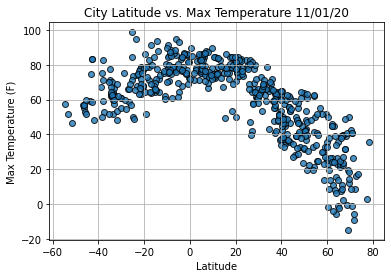

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

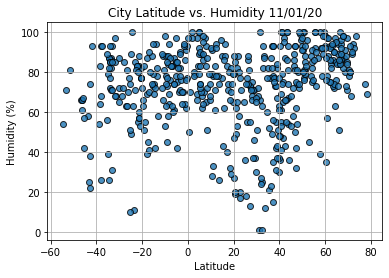

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

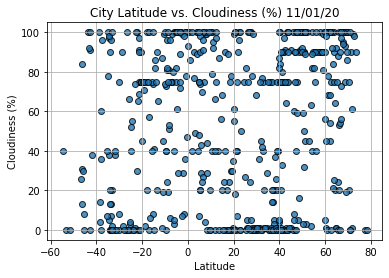

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

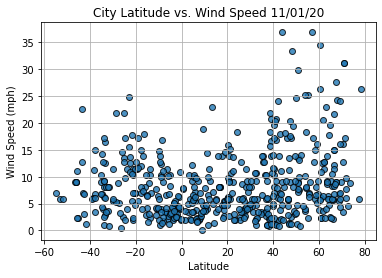

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2020-11-02 03:49:07
Lat                          3.07
Lng                        172.79
Max Temp                     82.2
Humidity                       79
Cloudiness                     49
Wind Speed                  10.31
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
510     True
511    False
512     True
513     True
514     True
Name: Lat, Length: 515, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2020-11-02 03:49:05,68.05,39.51,39.20,87,100,24.23
1,Hermanus,ZA,2020-11-02 03:49:06,-34.42,19.23,62.01,87,97,4.00
2,Fortuna,US,2020-11-02 03:48:03,40.60,-124.16,50.00,100,1,8.05
3,Khatanga,RU,2020-11-02 03:49:06,71.97,102.50,8.60,94,99,7.70
4,Kieta,PG,2020-11-02 03:49:06,-6.22,155.63,85.66,61,3,3.18


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

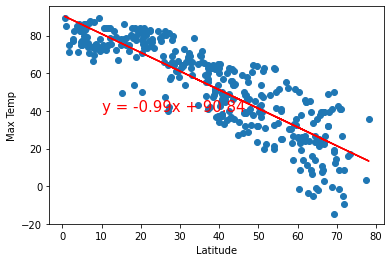

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


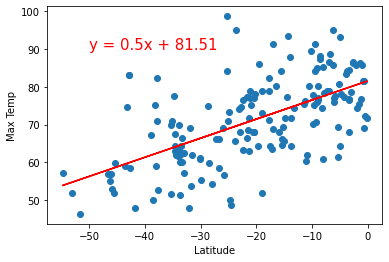

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))



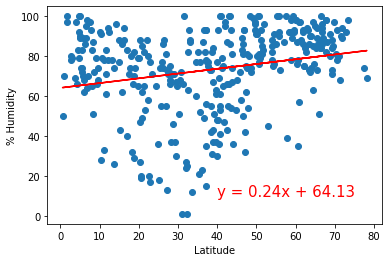

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


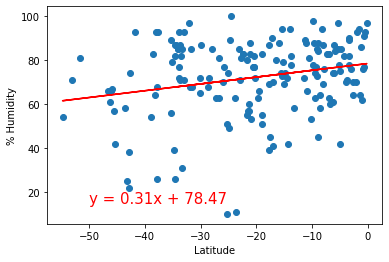

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

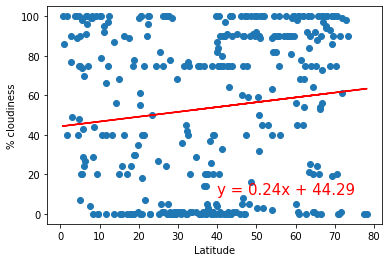

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% cloudiness',(40,10))


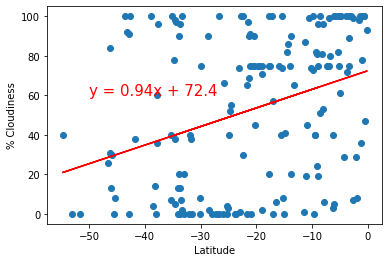

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

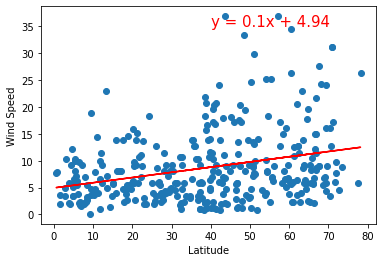

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

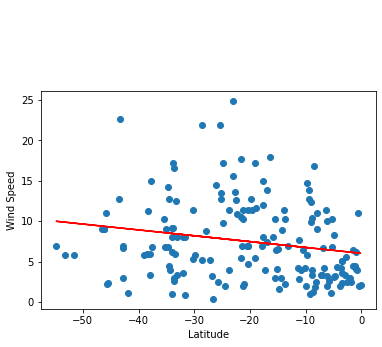

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))